In [1]:
from readWrite import *
from glob import glob
from gridModule import *
readFilename = glob('../TEST/*')[0]
fieldsDF, timeDict = readField(
        readFilename, ['UVEL',
                       'VVEL',
                       'WVEL',                       
                       'RHO',
                       'SHF',
                       'EVAP_F',
                       'PREC_F',
                       'TAUX', 
                       'TAUY', 
                       'time'])

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
var = fieldsDF.loc[fieldsDF['name'] == 'PREC_F']['val']
heading = var.keys()[0]
PREC_F = var[heading]

landMaskT = np.ma.getmask(np.ma.masked_where(KMT < 1, KMT))
PREC_F = np.ma.array(PREC_F, mask=landMaskT,
                             fill_value=float('nan')).filled()

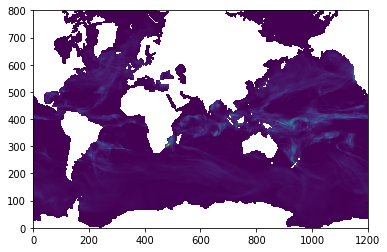

In [4]:
plt.pcolormesh(PREC_F[0,:,:])